In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import scipy
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is 

In [32]:
# This is so graphs are displayed.

%matplotlib inline

In [15]:
# Import original "NBA_players_csv" dataframe,

df = pd.read_csv(r'/Users/jlsanabria77/Desktop/FINAL PROJECT 6 NBA/Scripts/Data/Prepared Data/NBA_players.csv', engine="python")

In [16]:
# Create a subset from players NOT born in the USA
df_FO = df[df['country_of_birth']!="USA"]

In [17]:
df_FO.shape

(1735, 22)

In [19]:
# Create a subset from players born in the USA
df_US = df[df['country_of_birth']=="USA"]

In [20]:
df_US.shape

(9410, 22)

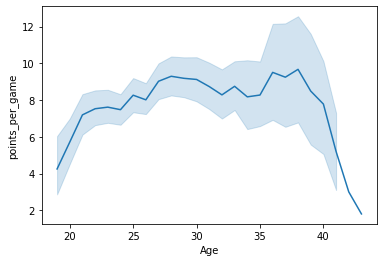

In [18]:
line = sns.lineplot(data = df_FO, x = 'Age', y= 'points_per_game')

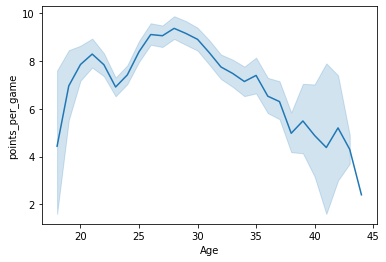

In [21]:
line = sns.lineplot(data = df_US, x = 'Age', y= 'points_per_game')

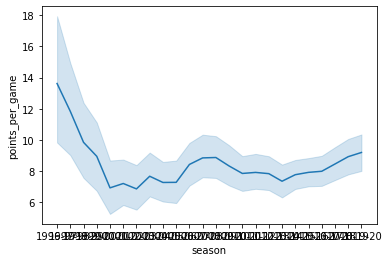

In [22]:
line = sns.lineplot(data = df_FO, x = 'season', y= 'points_per_game')

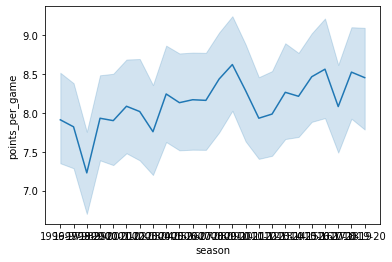

In [23]:
line = sns.lineplot(data = df_US, x = 'season', y= 'points_per_game')

In [35]:
# Remove all non-numerical columns

df_FO.drop(['Name','Team','college','draft_year','draft_round','position_drafted','country_of_birth','season'], axis=1,inplace=True)

/Users/jlsanabria77/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [36]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3, n_jobs = -1)


In [37]:
# Fit the k-means object to the data.

kmeans.fit(df_FO)

/Users/jlsanabria77/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=3, n_jobs=-1)

In [39]:
# Create a column with values corresponding to each cluster

df_FO['clusters'] = kmeans.fit_predict(df_FO)

/Users/jlsanabria77/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
<ipython-input-39-972ed4529f6f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_FO['clusters'] = kmeans.fit_predict(df_FO)


In [40]:
# Check how many observations fall into each cluster
df_FO['clusters'].value_counts()

2    674
0    565
1    496
Name: clusters, dtype: int64

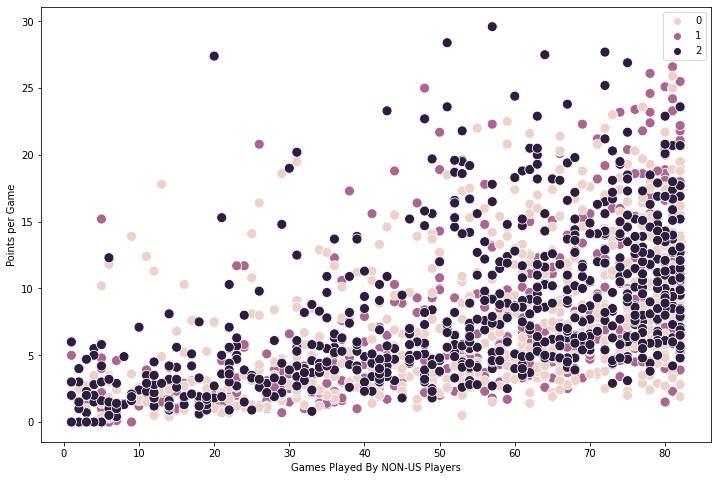

In [42]:
# Plot the clusters for the "Age" and "points_per_game" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_FO['games_played'], y=df_FO['points_per_game'], hue=kmeans.labels_, s=100) 

ax.grid(False) # Remove grid from background.
plt.xlabel('Games Played By NON-US Players') # Label x-axis.
plt.ylabel('Points per Game') # Label y-axis.
plt.show()

In [43]:
# Remove all non-numerical columns

df_US.drop(['Name','Team','college','draft_year','draft_round','position_drafted','country_of_birth','season'], axis=1,inplace=True)

/Users/jlsanabria77/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [44]:
# Fit the k-means object to the data.

kmeans.fit(df_US)

/Users/jlsanabria77/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=3, n_jobs=-1)

In [45]:
# Create a column with values corresponding to each cluster

df_US['clusters'] = kmeans.fit_predict(df_US)

/Users/jlsanabria77/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
<ipython-input-45-1326487d4185>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_US['clusters'] = kmeans.fit_predict(df_US)


In [46]:
# Check how many observations fall into each cluster
df_FO['clusters'].value_counts()

2    674
0    565
1    496
Name: clusters, dtype: int64

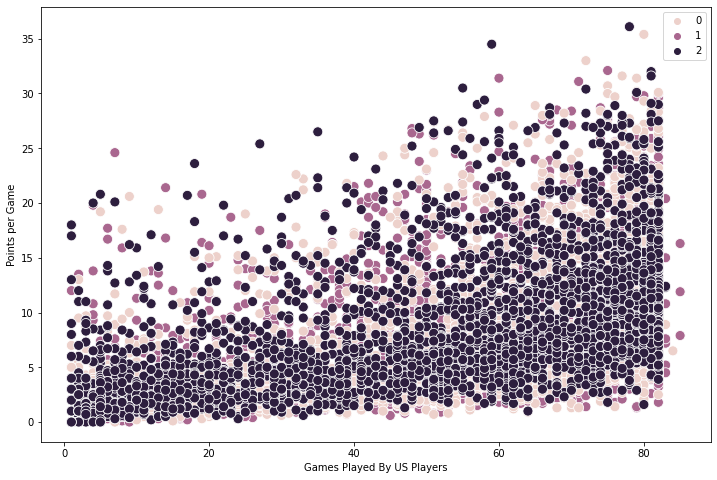

In [47]:
# Plot the clusters for the "Age" and "points_per_game" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_US['games_played'], y=df_US['points_per_game'], hue=kmeans.labels_, s=100) 

ax.grid(False) # Remove grid from background.
plt.xlabel('Games Played By US Players') # Label x-axis.
plt.ylabel('Points per Game') # Label y-axis.
plt.show()